In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [10]:
base_dir = "./../../../datasets/dogs-vs-cats/"

In [12]:
try:
    #YOUR CODE GOES HERE
#     base_dir = '/tmp/cats-v-dogs'
#     os.mkdir(base_dir)
    os.mkdir(base_dir + '/training')
    os.mkdir(base_dir + '/training/cats')
    os.mkdir(base_dir + '/training/dogs')
    os.mkdir(base_dir + '/testing')
    os.mkdir(base_dir + '/testing/cats')
    os.mkdir(base_dir + '/testing/dogs')
except OSError:
    pass

## Extra step to create source direcotry from kaggle dataset

In [24]:
source_files = os.listdir(base_dir + "train/")
source_base_dir = "./../../../datasets/dogs-vs-cats/train/"
CAT_SOURCE_DIR = base_dir + "train/Cat"
DOG_SOURCE_DIR = base_dir + "train/Dog"
try:
    os.mkdir(CAT_SOURCE_DIR)
    os.mkdir(DOG_SOURCE_DIR)
except OSError:
    pass

In [25]:
for file in source_files:
    file_name = file.split('.')[0]
    if file_name == 'dog':
        shutil.move(os.path.join(source_base_dir, file), os.path.join(DOG_SOURCE_DIR, file))
    else:
        shutil.move(os.path.join(source_base_dir, file), os.path.join(CAT_SOURCE_DIR, file))

In [26]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    training_size = int(len(os.listdir(SOURCE)) * SPLIT_SIZE)
    random_files = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))
    i = 0
    for file in random_files:
        if os.path.getsize(os.path.join(SOURCE, file)) > 0:
            if i < training_size:
                copyfile(os.path.join(SOURCE, file), os.path.join(TRAINING, file))
                i += 1
            else:
                copyfile(os.path.join(SOURCE, file), os.path.join(TESTING, file))
        else:
            print(file, "is zero length, so ignoring")
# YOUR CODE ENDS HERE


# CAT_SOURCE_DIR = base_dir + "train/Cat"
TRAINING_CATS_DIR = base_dir + "training/cats/"
TESTING_CATS_DIR = base_dir + "testing/cats/"
# DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = base_dir + "training/dogs/"
TESTING_DOGS_DIR = base_dir + "testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

In [27]:
print(len(os.listdir(TRAINING_CATS_DIR)))
print(len(os.listdir(TRAINING_DOGS_DIR)))
print(len(os.listdir(TESTING_CATS_DIR)))
print(len(os.listdir(TESTING_DOGS_DIR)))

11083
11070
1232
1230


In [28]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
# YOUR CODE HERE
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid') 
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [29]:
TRAINING_DIR = "./../../../datasets/dogs-vs-cats/training" #YOUR CODE HERE
train_datagen = ImageDataGenerator(rescale = 1.0/255.) #YOUR CODE HERE
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=125,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "./../../../datasets/dogs-vs-cats/testing" #YOUR CODE HERE
validation_datagen = ImageDataGenerator(rescale = 1.0/255.) #YOUR CODE HERE
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=125,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 22153 images belonging to 2 classes.
Found 2462 images belonging to 2 classes.


In [30]:
history = model.fit_generator(train_generator,
                              epochs=3,
                              verbose=1,
                              validation_data=validation_generator)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 178 steps, validate for 20 steps
Epoch 1/3
178/178 [==============================] - 155s 868ms/step - loss: 0.7208 - acc: 0.6167 - val_loss: 0.6416 - val_acc: 0.6519
Epoch 2/3
178/178 [==============================] - 142s 796ms/step - loss: 0.5400 - acc: 0.7312 - val_loss: 0.5217 - val_acc: 0.7543
Epoch 3/3
178/178 [==============================] - 157s 884ms/step - loss: 0.4565 - acc: 0.7836 - val_loss: 0.4669 - val_acc: 0.7713


Text(0.5, 1.0, 'Training and validation loss')

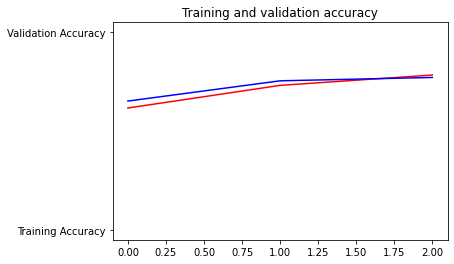

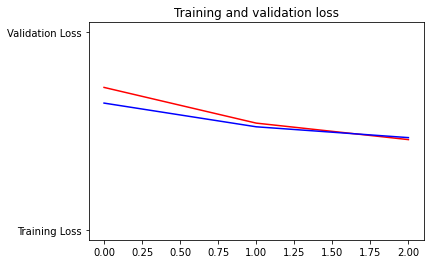

In [31]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();